## Time-Series Prediction
## Imports

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from keras.layers import GRU, Embedding, LSTM

from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
import yfinance as yf

In [4]:
from pandas_datareader import data as wb

## Download Stock Market Data using Yahoo Finance

[*********************100%***********************]  1 of 1 completed


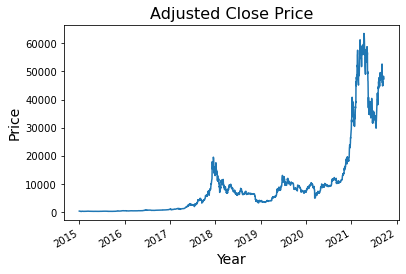

In [6]:
# Get the data of the stock AAPL
aapl = yf.download('BTC-USD','2015-01-01','2021-09-20')
# Plot the close price of the AAPL
aapl['Adj Close'].plot()
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

In [7]:

aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100


In [8]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2.451000e+03
mean,9350.419142,9615.081302,9062.177696,9368.796542,9368.796542,1.405968e+10
std,13369.841865,13771.965951,12909.307361,13389.640780,13389.640780,2.005808e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,639.860992,648.488007,631.771973,640.134003,640.134003,8.700620e+07
50%,6153.160156,6298.189941,5903.234375,6162.479980,6162.479980,4.922540e+09
75%,9725.666016,9930.312012,9531.005859,9729.562988,9729.562988,2.240453e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [9]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2451 entries, 2014-12-31 to 2021-09-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2451 non-null   float64
 1   High       2451 non-null   float64
 2   Low        2451 non-null   float64
 3   Close      2451 non-null   float64
 4   Adj Close  2451 non-null   float64
 5   Volume     2451 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.0 KB


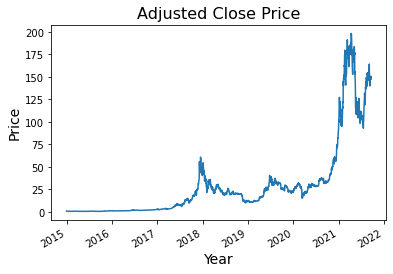

In [10]:
aapl_daily_returns = (aapl['Adj Close'].pct_change()+1).cumprod()
aapl_daily_returns.plot()
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()
#aapl_monthly_returns = aapl['Adj Close'].resample('M').ffill().pct_change()

In [11]:
aapl_daily_returns

Date
2014-12-31           NaN
2015-01-01      0.981436
2015-01-02      0.983882
2015-01-03      0.877852
2015-01-04      0.825112
                 ...    
2021-09-15    150.460343
2021-09-16    149.232995
2021-09-17    147.621967
2021-09-18    150.778950
2021-09-19    147.599166
Name: Adj Close, Length: 2451, dtype: float64

A nice tutorial on financial data analysis: https://www.codingfinance.com/post/2018-04-03-calc-returns-py/

Calculating the daily and monthly returns for individual stock:

Once we downloaded the stock prices from yahoo finance, the next thing to do is to calculate the returns. We will again use pandas package to do the calculations. We have already downloaded the price data for AAPL above, if you haven’t done that then see the above section. We will calculate the monthly and daily price returns.

aapl_daily_returns = aapl['Adj Close'].pct_change()

aapl_monthly_returns = aapl['Adj Close'].resample('M').ffill().pct_change()

Calculating the cumulative returns for individual stock:

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or, in other words, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the cumprod() function.

aapl_cum_returns = (aapl_daily_returns + 1).cumprod()

Plot the data:

fig = plt.figure()

ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

ax1.plot(aapl_cum_returns)

ax1.set_xlabel("Date")

ax1.set_ylabel("Percent")

ax1.set_title("AAPL daily returns data")

plt.show()

Download Several Stocks

## Download Several Stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


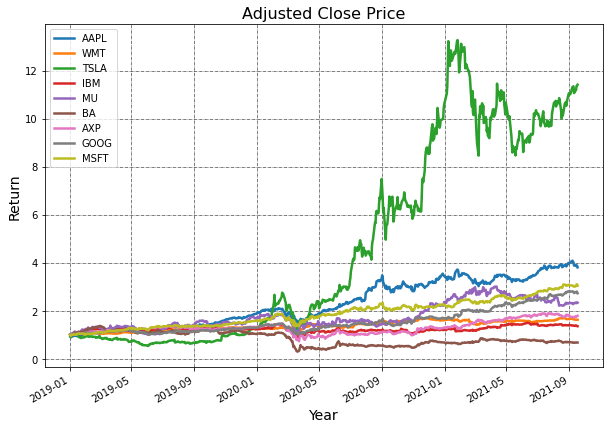

In [23]:
# Define the ticker list
tickers_list = ['AAPL', 'WMT','TSLA', 'IBM', 'MU', 'BA', 'AXP','GOOG','MSFT']

stock_data = pd.DataFrame(columns=tickers_list)
# Fetch the data

for ticker in tickers_list:
    stock_data[ticker] = yf.download(ticker, '2019-1-1', '2021-09-20')['Adj Close']
# Print first 5 rows of the data
#stock_data.head()


# Plot all the close prices
# the cumulative returns for individual stocks
((stock_data.pct_change()+1).cumprod()).plot(figsize=(10, 7), linewidth=2.5)
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Return', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

#plt.savefig('foo.png', transparent=True)

## Download Stock Market Data using Pandas DataReader

In [17]:
wb.DataReader??

In [50]:
#import datetime as dt
import datetime
start = '2021-6-20'
end = '2021-7-20'

tickers = ['CSCO','AXP','HD','PG']
#tickers =['AAPL', 'WMT','TSLA', 'IBM', 'MU', 'BA', 'AXP','GOOG','MSFT']
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,9,20)
stock_df = yf.download(tickers,start=start,end = end, interval='1d')
#thelen = len(tickers)

#price_data = []
#for ticker in tickers:
    #prices = wb.DataReader(ticker, start = start, end = end, data_source='quandl', api_key= 'UkbqzWBXjDdtEMgVASxH')[['AdjClose']]
    #price_data.append(prices.assign(ticker=ticker)[['ticker', 'AdjClose']])

#stock_df = pd.concat(price_data)
#stock_df.dtypes
#stock_df.head()
#stock_df.shape

[*********************100%***********************]  4 of 4 completed


In [51]:

stock_df

Adj Close                                          Close  \
                   AXP       CSCO          HD          PG         AXP   
Date                                                                    
2020-12-31  119.813828  43.768875  261.260590  136.567596  120.910004   
2021-01-04  116.969841  43.344891  259.588531  135.272003  118.040001   
2021-01-05  117.594131  43.364609  261.683563  136.135727  118.669998   
2021-01-06  121.944321  43.778736  263.178619  137.568741  123.059998   
2021-01-07  120.979752  44.330894  261.890106  136.282959  121.660004   
...                ...        ...         ...         ...         ...   
2021-09-13  161.449997  58.099998  335.450012  145.679993  161.449997   
2021-09-14  159.479996  57.869999  333.119995  145.429993  159.479996   
2021-09-15  161.339996  57.560001  333.369995  145.119995  161.339996   
2021-09-16  162.630005  57.330002  336.390015  144.110001  162.630005   
2021-09-17  163.919998  56.849998  335.670013  144.339996  163.919998   

                                                     High             \
                 CSCO          HD          PG         AXP       CSCO   
Date                                                                   
2020-12-31  44.750000  265.619995  139.139999  121.059998  44.840000   
2021-01-04  43.959999  263.920013  137.820007  121.800003  44.369999   
2021-01-05  43.980000  266.049988  138.699997  119.279999  44.070000   
2021-01-06  44.400002  267.570007  140.160004  124.730003  44.869999   
2021-01-07  44.959999  266.260010  138.850006  125.690002  45.110001   
...               ...         ...         ...         ...        ...   
2021-09-13  58.099998  335.450012  145.679993  161.800003  58.529999   
2021-09-14  57.869999  333.119995  145.429993  165.830002  58.470001   
2021-09-15  57.560001  333.369995  145.119995  162.309998  59.599998   
2021-09-16  57.330002  336.390015  144.110001  164.500000  58.820000   
2021-09-17  56.849998  335.670013  144.339996  164.250000  57.450001   

                                           Low                         \
                    HD          PG         AXP       CSCO          HD   
Date                                                                    
2020-12-31  265.950012  139.289993  119.160004  44.160000  263.579987   
2021-01-04  266.440002  139.860001  116.849998  43.349998  261.059998   
2021-01-05  266.529999  138.919998  117.099998  43.380001  262.260010   
2021-01-06  269.769989  141.039993  120.809998  43.889999  261.869995   
2021-01-07  268.779999  140.130005  117.349998  44.169998  266.170013   
...                ...         ...         ...        ...         ...   
2021-09-13  337.149994  147.229996  159.750000  57.730000  332.750000   
2021-09-14  337.489990  146.360001  158.779999  57.660000  332.420013   
2021-09-15  334.670013  145.770004  159.210007  57.060001  330.100006   
2021-09-16  337.839996  145.190002  162.199997  57.130001  334.170013   
2021-09-17  339.649994  146.279999  161.570007  56.470001  334.950012   

                              Open                                     \
                    PG         AXP       CSCO          HD          PG   
Date                                                                    
2020-12-31  137.389999  119.709999  44.380001  265.570007  138.309998   
2021-01-04  136.350006  121.300003  44.310001  266.010010  139.660004   
2021-01-05  136.270004  118.260002  43.680000  262.660004  137.990005   
2021-01-06  138.600006  121.000000  44.130001  264.059998  138.770004   
2021-01-07  138.039993  124.099998  44.200001  266.950012  139.750000   
...                ...         ...        ...         ...         ...   
2021-09-13  144.850006  160.639999  58.160000  334.950012  144.850006   
2021-09-14  144.949997  162.679993  58.240002  336.029999  146.130005   
2021-09-15  144.740005  160.020004  57.779999  333.359985  145.350006   
2021-09-16  142.820007  163.100006  58.310001  334.720001  144.839996   
2021-09-1

In [52]:
stock_df=stock_df['Adj Close']

In [53]:
stock_df

,AXP,CSCO,HD,PG
Date,,,,
2020-12-31,119.813828,43.768875,261.260590,136.567596
2021-01-04,116.969841,43.344891,259.588531,135.272003
2021-01-05,117.594131,43.364609,261.683563,136.135727
2021-01-06,121.944321,43.778736,263.178619,137.568741
2021-01-07,120.979752,44.330894,261.890106,136.282959
...,...,...,...,...
2021-09-13,161.449997,58.099998,335.450012,145.679993
2021-09-14,159.479996,57.869999,333.119995,145.429993
2021-09-15,161.339996,57.560001,333.369995,145.119995


In [54]:
table=stock_df

In [55]:
table.shape

(180, 4)

In [92]:
table.isnull().sum()

AXP     0
CSCO    0
HD      0
PG      0
dtype: int64

In [56]:
table

,AXP,CSCO,HD,PG
Date,,,,
2020-12-31,119.813828,43.768875,261.260590,136.567596
2021-01-04,116.969841,43.344891,259.588531,135.272003
2021-01-05,117.594131,43.364609,261.683563,136.135727
2021-01-06,121.944321,43.778736,263.178619,137.568741
2021-01-07,120.979752,44.330894,261.890106,136.282959
...,...,...,...,...
2021-09-13,161.449997,58.099998,335.450012,145.679993
2021-09-14,159.479996,57.869999,333.119995,145.429993
2021-09-15,161.339996,57.560001,333.369995,145.119995


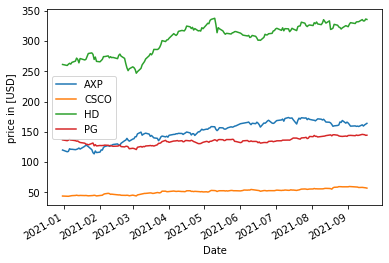

In [57]:
for column in table.columns:
    f = table[column] 
    #f = ((f.pct_change()+1).cumprod())
    f.plot(label=column);
    plt.legend()
    plt.ylabel('price in [USD]')

plt.show()

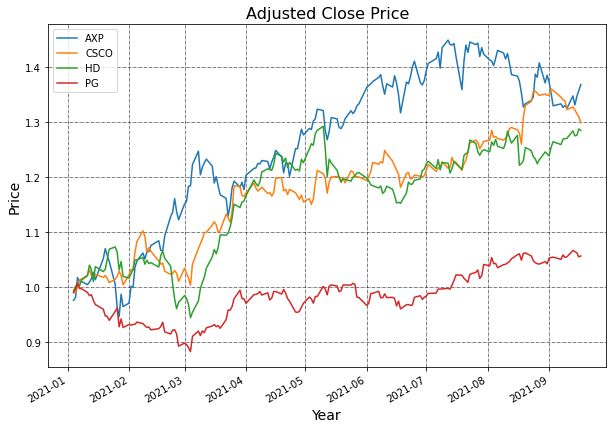

In [58]:

# Plot all the close prices
# the cumulative returns for individual stocks
((table.pct_change()+1).cumprod()).plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

## Split the Data into Train/test subsets .. ONLY use IBM

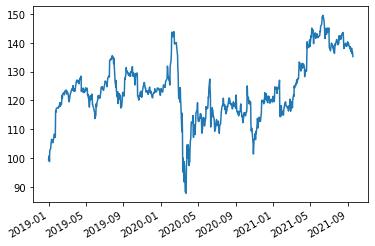

In [59]:
data = stock_data['IBM']
data.plot()

In [60]:
train_df = data[:400]#aapl['Adj Close'][:250]#df['Water Level (m)'][0:100]
print('train shape:', train_df.shape)
test_df = data[400:]#aapl['Adj Close'][250:]#df['Water Level (m)'][100:]
print('test shape: ',test_df.shape)

print("Min x:", np.min(train_df))
print("Max x:", np.max(train_df))

train shape: (400,)
test shape:  (285,)
Min x: 87.78524017333984
Max x: 143.86331176757812


## Normalise the Data into values between 0 and 1

In [61]:

## After this step train and test will become numpy matrices instead of pandas dataframes
## NOTICE: we use the model that is fitted to the train data to scale the test data .. 
## very important to do it this way!

x_scaler = MinMaxScaler()
train = x_scaler.fit_transform(train_df.values.reshape(-1, 1))
test = x_scaler.transform(test_df.values.reshape(-1, 1))

In [62]:
# make sure values are between 0-1
print("Min x:", np.min(train))
print("Max x:", np.max(train))

Min x: 0.0
Max x: 0.9999999999999998


### To Split Data into Sequences

In [63]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

## Create sequences for training data

In [64]:

seq = [1,2,3,4,5,6,7,8,9,10]
steps = 3
split_sequence(seq,steps)

(array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6],
        [5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]]),
 array([ 4,  5,  6,  7,  8,  9, 10]))

In [65]:
# define input sequence
# choose a number of time steps
n_steps = 5
# split into samples
X_train, y_train = split_sequence(train, n_steps)

In [66]:
X_train

array([[[0.20774122],
        [0.2317643 ],
        [0.19588613],
        [0.26467808],
        [0.2776255 ]],

       [[0.2317643 ],
        [0.19588613],
        [0.26467808],
        [0.2776255 ],
        [0.3038319 ]],

       [[0.19588613],
        [0.26467808],
        [0.2776255 ],
        [0.3038319 ],
        [0.31724734]],

       ...,

       [[0.58846423],
        [0.56603306],
        [0.54025426],
        [0.54728476],
        [0.51815805]],

       [[0.56603306],
        [0.54025426],
        [0.54728476],
        [0.51815805],
        [0.53238679]],

       [[0.54025426],
        [0.54728476],
        [0.51815805],
        [0.53238679],
        [0.49187723]]])

**Create sequences for test data**

In [67]:

# define test sequence
# choose a number of time steps .. same as training!
#n_steps = 5
# split into samples
X_test, y_test = split_sequence(test, n_steps)
#X_test.shape

**Data Shape suitable for feeding into TF/Keras**

In [68]:
print(X_train.shape)
print(X_test.shape)

(395, 5, 1)
(280, 5, 1)


## Model Building and Fitting (RNN, LSTM and GRU)

In [69]:
n_features = 1

# define model
model = Sequential()

# Single layer GRU
#model.add(GRU(32 , input_shape=(n_steps, n_features) ))

# Stacked GRU
#model.add(GRU(8 , input_shape=(n_steps, n_features) , return_sequences=True))
#model.add(GRU(16, return_sequences=True))
#model.add(GRU(32))

# Stacked LSTM
model.add(LSTM(8, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[es, mc])

# fit model
#model.fit(X_train, y_train, epochs=50, verbose=1, callbacks=[es, mc])

Train on 316 samples, validate on 79 samples
Epoch 1/100
316/316 [==============================] - 2s 7ms/step - loss: 0.3966 - val_loss: 0.2100

Epoch 00001: val_loss improved from inf to 0.21003, saving model to best_model.h5
Epoch 2/100
316/316 [==============================] - 0s 361us/step - loss: 0.3595 - val_loss: 0.1784

Epoch 00002: val_loss improved from 0.21003 to 0.17840, saving model to best_model.h5
Epoch 3/100
316/316 [==============================] - 0s 316us/step - loss: 0.3114 - val_loss: 0.1383

Epoch 00003: val_loss improved from 0.17840 to 0.13830, saving model to best_model.h5
Epoch 4/100
316/316 [==============================] - 0s 304us/step - loss: 0.2461 - val_loss: 0.0869

Epoch 00004: val_loss improved from 0.13830 to 0.08686, saving model to best_model.h5
Epoch 5/100
316/316 [==============================] - 0s 326us/step - loss: 0.1586 - val_loss: 0.0283

Epoch 00005: val_loss improved from 0.08686 to 0.02827, saving model to best_model.h5
Epoch 6/100


Epoch 00048: val_loss did not improve from 0.00401
Epoch 49/100
316/316 [==============================] - 0s 478us/step - loss: 0.0059 - val_loss: 0.0043

Epoch 00049: val_loss did not improve from 0.00401
Epoch 50/100
316/316 [==============================] - 0s 453us/step - loss: 0.0056 - val_loss: 0.0044

Epoch 00050: val_loss did not improve from 0.00401
Epoch 51/100
316/316 [==============================] - 0s 496us/step - loss: 0.0056 - val_loss: 0.0044

Epoch 00051: val_loss did not improve from 0.00401
Epoch 52/100
316/316 [==============================] - 0s 576us/step - loss: 0.0057 - val_loss: 0.0042

Epoch 00052: val_loss did not improve from 0.00401
Epoch 53/100
316/316 [==============================] - 0s 489us/step - loss: 0.0054 - val_loss: 0.0045

Epoch 00053: val_loss did not improve from 0.00401
Epoch 54/100
316/316 [==============================] - 0s 418us/step - loss: 0.0054 - val_loss: 0.0043

Epoch 00054: val_loss did not improve from 0.00401
Epoch 55/100

In [70]:
history.history

{'val_loss': [0.21003037162973912,
  0.17840420369860494,
  0.13830454553229898,
  0.0868637889057775,
  0.02826554389505447,
  0.010132442517323962,
  0.04284129419092891,
  0.01177071466971236,
  0.011630898217753143,
  0.018659068495506727,
  0.014536347422937426,
  0.012627647777052619,
  0.013286056969597747,
  0.012070339685895397,
  0.010805474305407533,
  0.009739871181052509,
  0.00872108819187159,
  0.008047271737993895,
  0.006798706917811327,
  0.006452069903688529,
  0.005937966251380365,
  0.005478080059991136,
  0.005023661688488873,
  0.004881893010527084,
  0.004828791409624811,
  0.004890310886033068,
  0.004580344637867676,
  0.005050231525792351,
  0.004356491155450857,
  0.004589339336557196,
  0.004632859375870115,
  0.004441920725357589,
  0.004324805180105982,
  0.00496811629862442,
  0.004161734035226835,
  0.004767068476074293,
  0.0048750060598684265,
  0.004013220873908906,
  0.004854815256121698,
  0.004486166124963025,
  0.004051744436868761,
  0.004776711

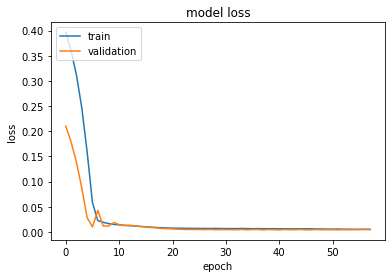

In [71]:

## visualise performance (training loss vs validation loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model Building and Fitting CNN

In [72]:
n_features = 1
# define model
model = Sequential()
#model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
395/395 [==============================] - 0s 418us/step - loss: 0.1599
Epoch 2/20
395/395 [==============================] - 0s 96us/step - loss: 0.0145
Epoch 3/20
395/395 [==============================] - 0s 84us/step - loss: 0.0059
Epoch 4/20
395/395 [==============================] - 0s 89us/step - loss: 0.0049
Epoch 5/20
395/395 [==============================] - 0s 124us/step - loss: 0.0037
Epoch 6/20
395/395 [==============================] - 0s 78us/step - loss: 0.0036
Epoch 7/20
395/395 [==============================] - 0s 84us/step - loss: 0.0034
Epoch 8/20
395/395 [==============================] - 0s 86us/step - loss: 0.0033
Epoch 9/20
395/395 [==============================] - 0s 104us/step - loss: 0.0032
Epoch 10/20
395/395 [==============================] - 0s 101us/step - loss: 0.0032
Epoch 11/20
395/395 [==============================] - 0s 89us/step - loss: 0.0029
Epoch 12/20
395/395 [==============================] - 0s 91us/step - loss: 0.0029
Epoch 13/

In [90]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 8)              320       
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 16)             1600      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                6272      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 8,225
Trainable params: 8,225
Non-trainable params: 0
_________________________________________________________________


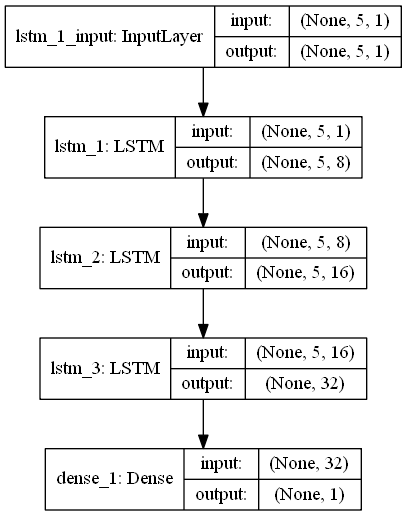

In [84]:
#visualize Model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file ='model_plot.png', show_shapes =True, show_layer_names=True)

In [93]:
from ann_visualizer.visualize import ann_viz;
import graphviz
import pydotplus
#ann_viz(model, view =True, filename ='network1.gv', title ='My neural network')

### Load the saved model

In [74]:

from keras.models import load_model

# load the saved model
model = load_model('best_model.h5')

## Compute RMSE for Evaluation

In [75]:

def rmse(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true)))

In [76]:
preds = []
# demonstrate predictions
for i in range(X_test.shape[0]):
    x_input = X_test[i]
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    preds.append(yhat[0])
    #print(yhat[0], y_test[i])

In [78]:
#preds

### After getting the predictions we need to transform the predicted and actual Y values into their original range
### Remember we applied scaling previously

In [79]:
# The output of the model is between 0 and 1.
# Do an inverse map to get it back to the scale
# of the original data-set.
preds   = x_scaler.inverse_transform(np.array(preds))
# we also rescale the y_test values into their original range (inverse scaling)
actuals = x_scaler.inverse_transform(y_test)

In [80]:
rmse(actuals, preds)

3.3948112345290413

## Plot True vs Predicted

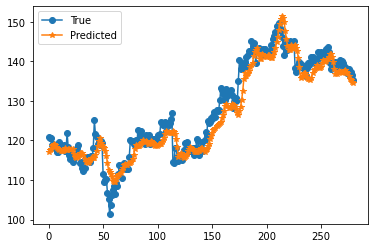

In [81]:
# multiple line plot
plt.plot(actuals, marker='o', label='True')
plt.plot(preds, marker='*', label='Predicted')

plt.legend()

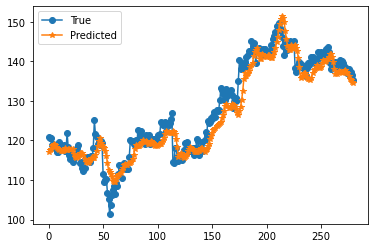

In [82]:
# multiple line plot
plt.plot(actuals, marker='o', label='True')
plt.plot(preds, marker='*', label='Predicted')

plt.legend()